In [78]:
import torch
from colorization_unet import ColorizationUNet
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

model = ColorizationUNet()
# 创建一个示例灰度图像，尺寸为(1, 1, 160, 160)
input_image = torch.randn(1, 1, 160, 160)
# 前向传播
output_image = model(input_image)
print(output_image.shape)  # 输出尺寸应为(1, 3, 160, 160)


torch.Size([1, 3, 160, 160])


In [79]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [80]:
# 将模型移动到GPU（如果可用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [81]:
model.load_state_dict(torch.load('./checkpoints/colorization_epoch_50.pth', map_location=device, weights_only=True))

<All keys matched successfully>

In [82]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [83]:
import torchvision.transforms as transforms
from DynamicEvenResize import DynamicEvenResize
import numpy as np
import torchvision.transforms as transforms
from PIL import Image

In [84]:
# 定义与训练时相同的变换
transform = transforms.Compose([
    DynamicEvenResize(),
    transforms.ToTensor(),
])

In [85]:
# 加载灰度图像并应用转换
gray_image = Image.open('landscape/color/0.jpg').convert('L')

# 应用预处理变换
gray_tensor = transform(gray_image).unsqueeze(0)  # (1, 1, H, W)

# 输出图像的预处理结果
print(f"Transformed gray image tensor shape: {gray_tensor.shape}")


Transformed gray image tensor shape: torch.Size([1, 1, 160, 160])


In [86]:
gray_tensor.size

<function Tensor.size>

In [87]:
# 使用模型进行预测
with torch.no_grad():
    output_color = model(gray_tensor.to(device))

# 将输出转换为图像并保存
output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]


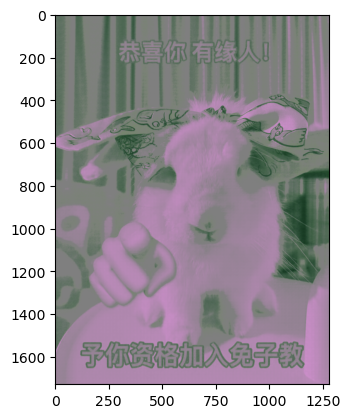

In [88]:
def img2grey(img_path):
    return Image.open(img_path).convert('L')


def colorized(model, img_path):
    # 加载灰度图像并预处理
    gray_image = img2grey(img_path)

    gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备
    # 使用模型进行预测
    with torch.no_grad():
        output_color = model(gray_tensor)

    # 将输出转换为图像并保存
    output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
    output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]
    return gray_image, output_img


gray_image, output_img = colorized(model, 'dataset/color/dacfc531ffa99deef0c36827af0c6aa8_720.png')
plt.imshow(output_img)


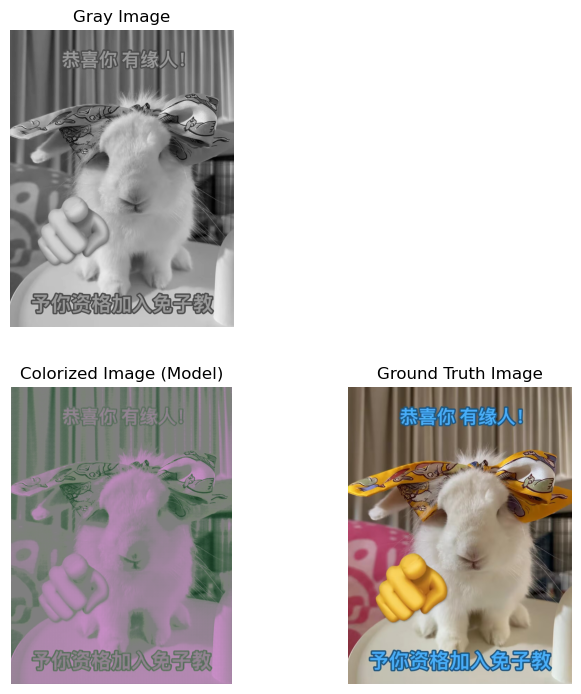

In [89]:
# 调用colorized函数，获取灰度图像和生成的彩色图像

img_path = r'dataset/color/dacfc531ffa99deef0c36827af0c6aa8_720.png'
gray_image, output_img = colorized(model, img_path)

# 加载 Ground Truth 彩色图像
ground_truth = Image.open(img_path)

# 创建一个图像窗口，并设置显示多个图像的布局
plt.figure(figsize=(8, 8.5
                    ))

# 第一个子图：灰度图像
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')  # 显示灰度图像，使用灰度颜色映射
plt.title('Gray Image')
plt.axis('off')  # 隐藏坐标轴

# 第二个子图：模型生成的彩色图像
plt.subplot(2, 2, 3)
plt.imshow(output_img)  # 显示模型生成的彩色图像
plt.title('Colorized Image (Model)')
plt.axis('off')  # 隐藏坐标轴

# 第三个子图：Ground Truth 彩色图像
plt.subplot(2, 2, 4)
plt.imshow(ground_truth)  # 显示真实的彩色图像 (Ground Truth)
plt.title('Ground Truth Image')
plt.axis('off')  # 隐藏坐标轴

plt.savefig('img.png', bbox_inches='tight')

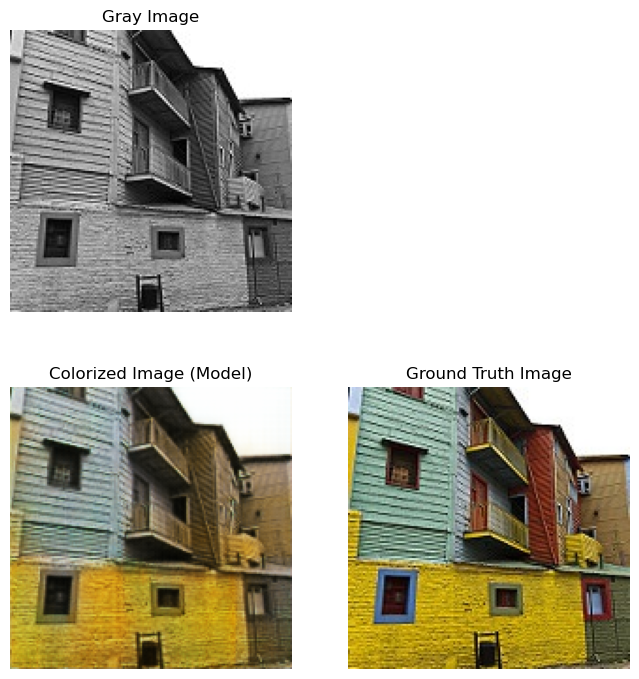

In [111]:
# 调用colorized函数，获取灰度图像和生成的彩色图像
gray_image, output_img = colorized(model, 'landscape/color/1.jpg')

# 加载 Ground Truth 彩色图像
ground_truth = Image.open('landscape/color/1.jpg')

# 创建一个图像窗口，并设置显示多个图像的布局
plt.figure(figsize=(8, 8.5
                    ))

# 第一个子图：灰度图像
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')  # 显示灰度图像，使用灰度颜色映射
plt.title('Gray Image')
plt.axis('off')  # 隐藏坐标轴

# 第二个子图：模型生成的彩色图像
plt.subplot(2, 2, 3)
plt.imshow(output_img)  # 显示模型生成的彩色图像
plt.title('Colorized Image (Model)')
plt.axis('off')  # 隐藏坐标轴

# 第三个子图：Ground Truth 彩色图像
plt.subplot(2, 2, 4)
plt.imshow(ground_truth)  # 显示真实的彩色图像 (Ground Truth)
plt.title('Ground Truth Image')
plt.axis('off')  # 隐藏坐标轴

plt.savefig('img.png', bbox_inches='tight')

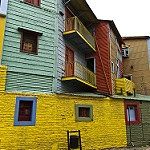

In [92]:
ground_truth

In [106]:
import torch
import torch.nn.functional as F
from skimage.metrics import structural_similarity as ssim
import numpy as np


# 假设 output_img 和 ground_truth 是张量，并且它们的值范围为 [0, 1]

# 计算PSNR
def calculate_psnr(output_img, ground_truth):
    mse = F.mse_loss(output_img, ground_truth)
    psnr_value = 10 * torch.log10(1 / mse)
    return psnr_value.item()



In [133]:
from PIL import Image
import numpy as np
import math
from skimage.metrics import structural_similarity as ssim


# 计算 PSNR 的函数
def calculate_psnr(output_img_np, ground_truth_np, max_pixel_value=255.0):
    mse = np.mean((output_img_np - ground_truth_np) ** 2)
    if mse == 0:  # 如果 MSE 为 0，意味着两张图像完全相同
        return float('inf')
    psnr = 20 * math.log10(max_pixel_value / math.sqrt(mse))
    return psnr


# 计算 SSIM 的函数，设置 win_size 和 data_range 参数
def calculate_ssim(output_img_np, ground_truth_np, win_size=4, data_range=255):
    # SSIM 计算支持多通道图像，手动设置 win_size 和 data_range
    ssim_value = ssim(output_img_np, ground_truth_np, multichannel=True, win_size=win_size, data_range=data_range)
    return ssim_value


# 定义 img_eval 函数，支持传入计算方法
def img_eval(model, img_path, eval_fn):
    # 调用 colorized 函数，获取灰度图像和生成的彩色图像
    gray_image, output_img = colorized(model, img_path)

    # 加载 Ground Truth 彩色图像
    ground_truth = Image.open(img_path)

    # 如果 output_img 是 NumPy 数组，获取其大小 (height, width)
    output_img_size = output_img.shape

    # 调整 ground_truth 的大小为 output_img 的大小 (height, width)
    ground_truth_resized = ground_truth.resize((output_img_size[1], output_img_size[0]), Image.LANCZOS)

    # 将 PIL 图像和模型生成图像转换为 NumPy 数组，并转换为浮点数进行计算
    output_img_np = output_img.astype(np.float32) * 255.0  # 将 output_img 从 [0, 1] 转换为 [0, 255]
    ground_truth_np = np.array(ground_truth_resized).astype(np.float32)

    # 确保范围在 [0, 255] 之间
    output_img_np = np.clip(output_img_np, 0, 255)

    # 调用传入的计算方法（如 PSNR 或 SSIM）
    eval_value = eval_fn(output_img_np, ground_truth_np)

    # print(output_img_np)
    return eval_value


model.load_state_dict(torch.load('./colorization_epoch_50.pth', map_location=device, weights_only=True))

model.load_state_dict(torch.load('./checkpoints/colorization_epoch_50.pth', map_location=device, weights_only=True))

weight_path = r"D:\pythonProject\Colorization\checkpoints\colorization_epoch_10.pth"

model.load_state_dict(torch.load(weight_path, map_location=device, weights_only=True))

# 示例调用，传入计算 PSNR 的方法
psnr_value = img_eval(model, 'landscape/color/1.jpg', calculate_psnr)
print(f"PSNR: {psnr_value}")

# 示例调用，传入计算 SSIM 的方法，并设置较小的 win_size 和指定 data_range
ssim_value = img_eval(model, 'landscape/color/1.jpg', lambda x, y: calculate_ssim(x, y, win_size=3, data_range=255))
print(f"SSIM: {ssim_value}")


PSNR: 18.893973602223195
SSIM: 0.6433850958834383


In [134]:
# 定义从 epoch 10 到 50 的循环
for epoch in range(10, 51, 10):
    weight_path = f"D:\\pythonProject\\Colorization\\checkpoints\\colorization_epoch_{epoch}.pth"

    # 加载不同 epoch 对应的模型权重
    model.load_state_dict(torch.load(weight_path, map_location=device, weights_only=True))

    # 计算并打印 PSNR
    psnr_value = img_eval(model, 'landscape/color/1.jpg', calculate_psnr)
    print(f"Epoch {epoch} - PSNR: {psnr_value}")

    # 计算并打印 SSIM
    ssim_value = img_eval(model, 'landscape/color/1.jpg', lambda x, y: calculate_ssim(x, y, win_size=3, data_range=255))
    print(f"Epoch {epoch} - SSIM: {ssim_value}")

Epoch 10 - PSNR: 18.89397297023155
Epoch 10 - SSIM: 0.643385074328081
Epoch 20 - PSNR: 21.524802677518906
Epoch 20 - SSIM: 0.7796897413397001
Epoch 30 - PSNR: 22.59423444968619
Epoch 30 - SSIM: 0.8354498703668987
Epoch 40 - PSNR: 22.83506535528192
Epoch 40 - SSIM: 0.8399693451279702
Epoch 50 - PSNR: 23.39726793897309
Epoch 50 - SSIM: 0.8565270047211


In [114]:
from skimage import io

io.imread("landscape/color/0.jpg").astype(np.float32)

array([[[ 84.,  99., 118.],
        [ 72.,  87., 106.],
        [ 95., 110., 129.],
        ...,
        [ 81.,  73.,  62.],
        [ 81.,  73.,  62.],
        [ 82.,  74.,  63.]],

       [[197., 212., 231.],
        [180., 195., 214.],
        [173., 188., 207.],
        ...,
        [ 75.,  67.,  56.],
        [ 73.,  65.,  54.],
        [ 76.,  68.,  57.]],

       [[ 88., 105., 123.],
        [182., 199., 217.],
        [198., 215., 235.],
        ...,
        [ 72.,  64.,  53.],
        [ 81.,  73.,  62.],
        [ 84.,  76.,  65.]],

       ...,

       [[ 37.,  35.,  38.],
        [ 43.,  41.,  44.],
        [ 35.,  33.,  34.],
        ...,
        [ 45.,  41.,  42.],
        [ 26.,  22.,  23.],
        [ 37.,  33.,  34.]],

       [[ 41.,  39.,  40.],
        [ 32.,  30.,  31.],
        [ 24.,  22.,  23.],
        ...,
        [ 18.,  16.,  17.],
        [ 14.,  10.,  11.],
        [ 15.,  11.,  12.]],

       [[ 24.,  22.,  23.],
        [ 28.,  26.,  27.],
        [ 43.,  

In [123]:
calculate_psnr(io.imread("landscape/color/0.jpg").astype(np.float32),
               io.imread("landscape/color/0.jpg").astype(np.float32))

inf

In [93]:
from PIL import Image
import numpy as np

# 假设 output_img 是 NumPy 数组
output_img_size = output_img.shape  # 获取模型生成图像的尺寸 (height, width, channels)

# 打印输出模型生成图像的尺寸
print("Output image size (height, width, channels):", output_img_size)

# 调整 ground_truth 的大小为 output_img 的大小 (height, width)
ground_truth_resized = ground_truth.resize((output_img_size[1], output_img_size[0]), Image.LANCZOS)

# 打印调整后的 ground truth 尺寸
print("Resized ground truth size:", ground_truth_resized.size)

# 将调整后的 ground truth 转换为 NumPy 数组
ground_truth_np = np.array(ground_truth_resized)

# 打印转换为 NumPy 数组后的 ground truth 的形状
print("Ground truth as NumPy array shape:", ground_truth_np.shape)


Output image size (height, width, channels): (160, 160, 3)
Resized ground truth size: (160, 160)
Ground truth as NumPy array shape: (160, 160, 3)


In [94]:
# 确保数据类型一致，转换为浮点数计算
output_img_np = output_img.astype(np.float32)
ground_truth_np = ground_truth_np.astype(np.float32)

In [95]:
# 计算 PSNR
import math


def calculate_psnr(output_img_np, ground_truth_np, max_pixel_value=255.0):
    mse = np.mean((output_img_np - ground_truth_np) ** 2)
    if mse == 0:  # 如果 MSE 为 0，意味着两张图像完全相同
        return float('inf')
    psnr = 20 * math.log10(max_pixel_value / math.sqrt(mse))
    return psnr


# 计算并打印 PSNR
psnr_value = calculate_psnr(output_img_np, ground_truth_np)
print(f"PSNR: {psnr_value}")

PSNR: 5.600046669982795


In [96]:
# import os
# from PIL import Image
# import matplotlib.pyplot as plt
# 
# def colorized(model, img_path):
#     # 加载灰度图像并预处理
#     gray_image = Image.open(img_path).convert('L')
# 
#     gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备
#     # 使用模型进行预测
#     with torch.no_grad():
#         output_color = model(gray_tensor)
# 
#     # 将输出转换为图像并保存
#     output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
#     output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]
#     return gray_image, output_img
# 
# # 定义路径
# gray_folder = 'landscape/gray'
# color_folder = 'landscape/color'
# output_folder = './output'
# 
# # 如果输出文件夹不存在，则创建
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
# 
# # 遍历灰度图像文件夹
# for gray_filename in os.listdir(gray_folder):
#     if gray_filename.endswith('.jpg'):  # 确保是图像文件
#         gray_path = os.path.join(gray_folder, gray_filename)
#         color_path = os.path.join(color_folder, gray_filename)  # 假设灰度和彩色图像同名
# 
#         if os.path.exists(color_path):  # 确保对应的彩色图像存在
#             # 获取灰度图像和模型生成的彩色图像
#             gray_image, output_img = colorized(model, gray_path)
# 
#             # 加载 Ground Truth 彩色图像
#             ground_truth = Image.open(color_path)
# 
#             # 创建一个图像窗口，并设置显示多个图像的布局
#             plt.figure(figsize=(8, 8.5))
# 
#             # 第一个子图：灰度图像
#             plt.subplot(2, 2, 1)
#             plt.imshow(gray_image, cmap='gray')  # 显示灰度图像，使用灰度颜色映射
#             plt.title('Gray Image')
#             plt.axis('off')  # 隐藏坐标轴
# 
#             # 第二个子图：模型生成的彩色图像
#             plt.subplot(2, 2, 3)
#             plt.imshow(output_img)  # 显示模型生成的彩色图像
#             plt.title('Colorized Image (Model)')
#             plt.axis('off')  # 隐藏坐标轴
# 
#             # 第三个子图：Ground Truth 彩色图像
#             plt.subplot(2, 2, 4)
#             plt.imshow(ground_truth)  # 显示真实的彩色图像 (Ground Truth)
#             plt.title('Ground Truth Image')
#             plt.axis('off')  # 隐藏坐标轴
# 
#             # 保存结果到 output 文件夹，文件名和输入的灰度图像同名
#             output_path = os.path.join(output_folder, gray_filename)
#             plt.savefig(output_path, bbox_inches='tight')
#             plt.close()  # 关闭当前图像窗口以释放内存


In [97]:
# !jupyter nbconvert --to markdown infer.ipynb